In [1]:
from pygo import optimization_problem as op
from pygo import optimization_problem as op
from pygo import global_optimizers as go
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import models

In [2]:
p = op.OptimizationProblem('max',lambda x:(x**2).ravel(),[0],[10],True)
g = go.GlobalOptimizer()
x,y = g.adaptive_pso(p)
x,y

(array([9.99739898]), 99.94798643383459)

### Make Classification data

In [3]:
X, Y = make_classification(3000,n_features=100, n_redundant=0, n_informative=1,n_clusters_per_class=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

### Implementation outline
Follows any other regular implementation of logistic regression just the gradient descent optimization part is replaced by global optimization techniques. See https://github.com/phantom820/Py-Go/blob/master/machine_learning_examples/models.py

### Logistic Regression (pso optimizer)

/home/phantom/Documents/projects/Py-Go/machine_learning_examples/models.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Failed to converge after 200 iterations
Training score 98.41666666666666
Testing score 97.0


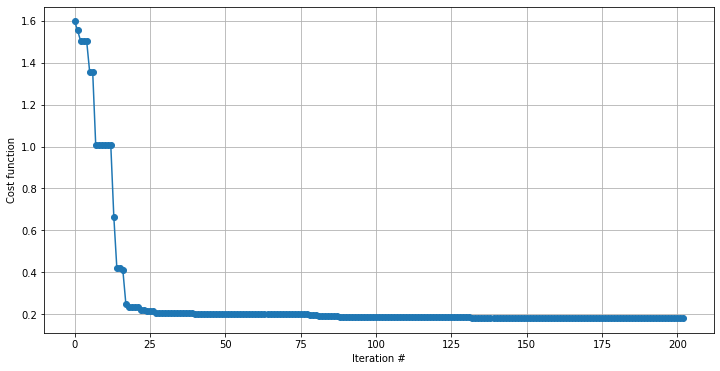

In [5]:
lr = models.LogisticRegression(2)
lr.fit(X_train,y_train,optimizer={'algo':'pso','N':30,'w':0.6})
training_score = lr.score(X_train,y_train)
J = lr.cost_function_values
testing_score = lr.score(X_test,y_test)
print("Training score",training_score)
print("Testing score",testing_score)
plt.figure(figsize=(12,6))
plt.grid()
plt.ylabel('Cost function')
plt.xlabel('Iteration #')
plt.plot(np.arange(len(J)),J,marker='o')

### Logistic Regression (adaptive_pso)

In [ ]:
lr = models.LogisticRegression(2)
lr.fit(X_train,y_train,optimizer={'algo':'apso','N':25,'w_init':0.9})
training_score = lr.score(X_train,y_train)
J = lr.cost_function_values
testing_score = lr.score(X_test,y_test)
print("Training score",training_score)
print("Testing score",testing_score)
plt.figure(figsize=(12,6))
plt.grid()
plt.ylabel('Cost function')
plt.xlabel('Iteration #')
plt.plot(np.arange(len(J)),J,marker='o')

### Logistic Regression (Genetic algorithm)

In [ ]:
lr = models.LogisticRegression(2)
lr.fit(X_train,y_train,optimizer={'algo':'ga','N':50,'mutation':False,'max_iter':300,})
training_score = lr.score(X_train,y_train)
J = lr.cost_function_values
testing_score = lr.score(X_test,y_test)
print("Training score",training_score)
print("Testing score",testing_score)
plt.figure(figsize=(12,6))
plt.grid()
plt.ylabel('Cost function')
plt.xlabel('Generation #')
plt.plot(np.arange(len(J)),J,marker='o')

### Differential Evolution

In [ ]:
lr = models.LogisticRegression(2)
lr.fit(X_train,y_train,optimizer={'algo':'de','N':50,'F':1.5,'CR':0.9,'max_iter':100})
training_score = lr.score(X_train,y_train)
J = lr.cost_function_values
testing_score = lr.score(X_test,y_test)
print("Training score",training_score)
print("Testing score",testing_score)
plt.figure(figsize=(12,6))
plt.grid()
plt.ylabel('Cost function')
plt.xlabel('Generation #')
plt.plot(np.arange(len(J)),J,marker='o')